# NYPD TRAFFICK ACCIDENT
As a Data Analyst i was given a task to clean the data gathered by New York Police Department concerning Accident occurrences from January- December 2018. Each record represent an individual accident including the Date, Time, Geographical Information(such as: Borough, location,off_street, cross_street and on_street) of the accident, type of vehicle involved, the severity of the accident and the cause of the accident. 
- this data can be used to identify trends in the frequency of accident occurences in a specific area or even a certain period.
- we can identify the patterns in times of the day when accidents  most likely occurs.
- which area has the highest number of accidents leading to death or injury.
- we can also know how aware the public is to safe driving practices and also how effective traffic control is.





                                                                        DATA EXPLORATION

In [53]:
# importing relevant libaries
import pandas as pd
import numpy as np
import missingno as ms
import datetime as dt


In [54]:
# to see the full length of the columns in our dataframe
pd.set_option("display.max.columns", 30)

In [55]:
# Loading data from Local Storage
explore=pd.read_csv(r"C:\Users\HASSAN\Desktop\Data Analysis_TEST2\nypd_mvc_2018.csv")
explore

,unique_key,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,motorist_injured,total_injured,pedestrians_killed,cyclist_killed,motorist_killed,total_killed,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
0,3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,0,0.0,0,0,0,0.0,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
1,3847947,2018-02-13,14:45,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,62 STREET,NaN,0,0,0,0.0,0,0,0,0.0,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN
2,3914294,2018-06-04,0:00,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN,0,0,1,1.0,0,0,0,0.0,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
3,3915069,2018-06-05,6:36,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,VANLOON STREET,NaN,0,0,0,0.0,0,0,0,0.0,Sedan,Sedan,NaN,NaN,NaN,Glare,Passing Too Closely,NaN,NaN,NaN
4,3923123,2018-06-16,15:45,BRONX,"(40.884727, -73.89945)",NaN,NaN,208 WEST 238 STREET,0,0,0,0.0,0,0,0,0.0,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Turning Improperly,Unspecified,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57859,3835191,2018-01-26,14:51,BRONX,"(40.85477, -73.90299)",CRESTON AVENUE,EAST 181 STREET,NaN,3,0,0,3.0,0,0,0,0.0,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Unspecified,NaN,NaN,NaN,NaN
57860,3890674,2018-04-29,18:30,QUEENS,"(40.78419, -73.84582)",COLLEGE POINT BOULEVARD,15 AVENUE,NaN,0,0,0,0.0,0,0,0,0.0,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN
57861,3946458,2018-07-21,16:45,NaN,"(40.711926, -74.0061)",PARK ROW,NaN,NaN,0,0,1,1.0,0,0,0,0.0,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Turning Improperly,Unspecified,NaN,NaN,NaN
57862,3914574,2018-06-04,5:45,NaN,"(40.71976, -73.94476)",BROOKLYN QUEENS EXPRESSWAY,NaN,NaN,0,0,0,0.0,0,0,0,0.0,Sedan,Tractor Truck Diesel,Station Wagon/Sport Utility Vehicle,NaN,NaN,Other Vehicular,Unspecified,Unspecified,NaN,NaN


- from the given dataset. looking at it is a gathered dataset by the new york police department (NYPD) concerning accident occurrence in the six(6) regions.
- categorically the dataset is shared into, date, time, geographical information, type of vehicle, accident severity, and causes of accident


In [56]:
# getting basic details of my dataset 
explore.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57864 entries, 0 to 57863
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   unique_key           57864 non-null  int64  
 1   date                 57864 non-null  object 
 2   time                 57864 non-null  object 
 3   borough              37218 non-null  object 
 4   location             53979 non-null  object 
 5   on_street            43903 non-null  object 
 6   cross_street         28615 non-null  object 
 7   off_street           13771 non-null  object 
 8   pedestrians_injured  57864 non-null  int64  
 9   cyclist_injured      57864 non-null  int64  
 10  motorist_injured     57864 non-null  int64  
 11  total_injured        57863 non-null  float64
 12  pedestrians_killed   57864 non-null  int64  
 13  cyclist_killed       57864 non-null  int64  
 14  motorist_killed      57864 non-null  int64  
 15  total_killed         57859 non-null 

in my Exploration Data Analysis. i will perform the following task:
1. check if the columns in my dataset is properly formatted
    - check if data-items does not contain leading or trailing spaces, 
    -  test are in lowercase for easy readability
    - all data-item are spelled well and in better namimg conventions for easy interpretations.
2. check to see if there is no duplicates
3. identify number of unique values against duplicates for each columns
4. check the data type of each columns to know if data are consistent 
5. check for sum of missing values in each columns
6. filter out some important columns (related to date, time, geographical information, type of vehicle, accident severity and causes of accident )


In [57]:
# Checking column formats
explore.columns

Index(['unique_key', 'date', 'time', 'borough', 'location', 'on_street',
       'cross_street', 'off_street', 'pedestrians_injured', 'cyclist_injured',
       'motorist_injured', 'total_injured', 'pedestrians_killed',
       'cyclist_killed', 'motorist_killed', 'total_killed', 'vehicle_1',
       'vehicle_2', 'vehicle_3', 'vehicle_4', 'vehicle_5', 'cause_vehicle_1',
       'cause_vehicle_2', 'cause_vehicle_3', 'cause_vehicle_4',
       'cause_vehicle_5'],
      dtype='object')

merely looking at these, i can see that the columns are properly pre-formatted

In [58]:
# checking for total number of duplicate rows in the dataframe
explore_dup=explore.duplicated().sum()
explore_dup

0

- from the returned value(0). i can say there are no duplicate rows in the Dataframe. each row is unique, and there are no identical rows based on all columns.
- this is a positive outcome as it suggests data integrity and helps ensure accurate analyses without concerns about duplicate entries.


In [59]:
# Checking for number of unique values in each column
explore.nunique() 


unique_key             57864
date                     365
time                    1433
borough                    5
location               30018
on_street               3655
cross_street            4057
off_street             12459
pedestrians_injured        6
cyclist_injured            3
motorist_injured          15
total_injured             15
pedestrians_killed         2
cyclist_killed             2
motorist_killed            2
total_killed               2
vehicle_1                229
vehicle_2                231
vehicle_3                 53
vehicle_4                 19
vehicle_5                 12
cause_vehicle_1           55
cause_vehicle_2           42
cause_vehicle_3           24
cause_vehicle_4           10
cause_vehicle_5            7
dtype: int64

looking at the above result. i can say the "unique_key" has the highest number of unique values. this column can represent our primary key that will identify all other rows, thereby ensuring data integrity

In [60]:
# checking the data type of each columns for consistency
explore.dtypes

unique_key               int64
date                    object
time                    object
borough                 object
location                object
on_street               object
cross_street            object
off_street              object
pedestrians_injured      int64
cyclist_injured          int64
motorist_injured         int64
total_injured          float64
pedestrians_killed       int64
cyclist_killed           int64
motorist_killed          int64
total_killed           float64
vehicle_1               object
vehicle_2               object
vehicle_3               object
vehicle_4               object
vehicle_5               object
cause_vehicle_1         object
cause_vehicle_2         object
cause_vehicle_3         object
cause_vehicle_4         object
cause_vehicle_5         object
dtype: object

from observation, i can see that most columns as an "object" datatype. for easier "date" and "time" interpretation, i will use the datetime library to ensure there consistency throughout the table"

In [61]:
# checking for the number of missing values in each column
explore.isnull().sum()


unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64

looking at the numbers i can say;
- the columns: unique key, date, time and accident severity(all injured and killed) are highly populated with values. 
- the geographic info(borough, location, on_street, off_street and cross_street) display inconsistent data, with only location being the most populated.
- the columns related to vehicle 3-5 and cause_vehicle 3-5 shows a large amount of missing values.

In [62]:
# filtering important columns
# date and time
# explore["vehicle_3"].value_counts(dropna=False)
# explore.columns

from overall EDA, i can say that; 
 - the date and time datatype need to be changed from object to datetime 
 - all columns with "unspecified" values and empty must be made NaN to maintain consistency and also to get a better visual view of missing values later
 - location column containing coordinates will be splitted into separate columns of longitude and latitude to make it easier to perform analysis and visualizations.
 - also from the accident severity category, although the pedestrians_injured', 'cyclist_injured','motorist_injured' columns, are fully populated, the 'total_injured' column has 1 value missing. same applies to the 'pedestrians_killed','cyclist_killed', 'motorist_killed' columns, with the 'total_killed' missing 5 values. we can asssume the total number of injured and killed respectively is the sum of pedestrians, cysclist and motorist injured and killed respectively.


                                                                         DATA CLEANING

In [63]:
#  Date and Time formatting 
explore["date"]=pd.to_datetime(explore["date"])
explore["time"]=pd.to_datetime(explore["time"],format="%H:%M").dt.time
explore.info()
#explore.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57864 entries, 0 to 57863
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   unique_key           57864 non-null  int64         
 1   date                 57864 non-null  datetime64[ns]
 2   time                 57864 non-null  object        
 3   borough              37218 non-null  object        
 4   location             53979 non-null  object        
 5   on_street            43903 non-null  object        
 6   cross_street         28615 non-null  object        
 7   off_street           13771 non-null  object        
 8   pedestrians_injured  57864 non-null  int64         
 9   cyclist_injured      57864 non-null  int64         
 10  motorist_injured     57864 non-null  int64         
 11  total_injured        57863 non-null  float64       
 12  pedestrians_killed   57864 non-null  int64         
 13  cyclist_killed       57864 non-

In [64]:
#  Handling Missing Values in the dataframe
clean2=explore.replace(" ", np.nan)
clean2=explore.replace("unspecified", np.nan)
clean2=explore.replace("Unspecified", np.nan)
print(explore.isnull().sum())
print("\n")
print(clean2.isnull().sum())
print("\n")

unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64


unique_key                 0
date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093

from observation, i can see that the cause of accident category is really affected. most causes of accident are not being identified. especially for cause_vehicle 2,3,4,5. 

<Axes: >

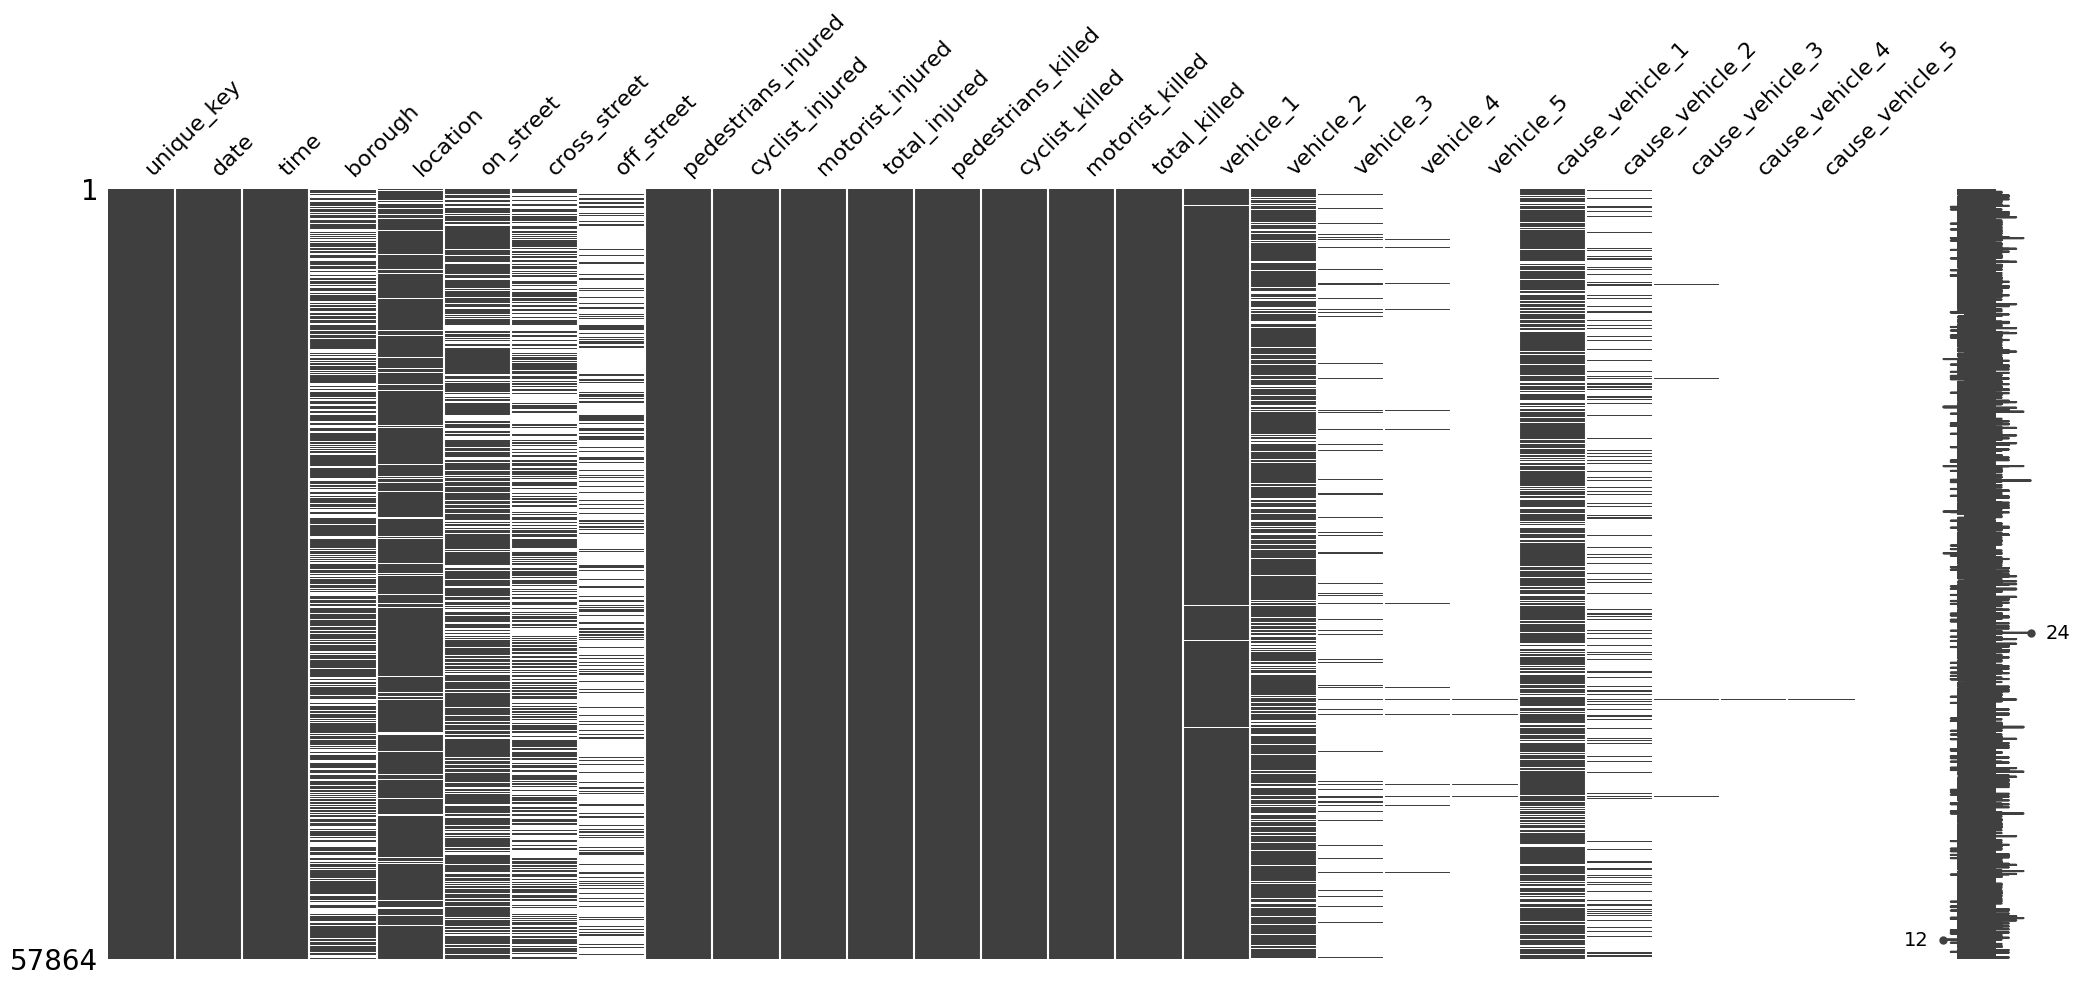

In [65]:
# to get a better view of the cleaned dataframe 
%matplotlib inline
ms.matrix(clean2)

- looking at the chart there is a predominant completeness in the fields of unique key, date, time, accident severity(e.g pedestrians_injured, motorist_killed etc). 
- However the geographical information displays inconsistent data, with location being the most consistently populated. 
- specifically, the columns related to vehicle 3-5 and cause_vehicle 3-5 show substantial gaps, with substantial lack of information in this field.

        Cleaning up the Location Column 

In [66]:
# using apply and lambda function to extract the coordinates from the location column with the paranthesis and then Split the result into two separate columns longtitude and latitude
#clean2["location"].value_counts(dropna=False)
clean3=clean2
clean3[["latitude","longitude"]]=clean3["location"].apply(lambda x: pd.Series(str(x).strip("()").split()))
#clean3.info()

In [67]:
# replaced all nan value to actual NaN value i.e missing value
clean3["latitude"]=clean3["latitude"].replace("nan", np.nan)
clean3["latitude"]=clean3["latitude"].str.strip(",")


In [68]:
# converting longitude and latitide column to float
clean3[["latitude","longitude"]]=clean3[["latitude","longitude"]].astype(float)

In [69]:
#clean3[["latitude","longitude"]].head(30)
#clean3
# clean3["latitude"].value_counts(dropna=False)
clean3.info()
# clean3["longitude"].value_counts(dropna=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57864 entries, 0 to 57863
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   unique_key           57864 non-null  int64         
 1   date                 57864 non-null  datetime64[ns]
 2   time                 57864 non-null  object        
 3   borough              37218 non-null  object        
 4   location             53979 non-null  object        
 5   on_street            43903 non-null  object        
 6   cross_street         28615 non-null  object        
 7   off_street           13771 non-null  object        
 8   pedestrians_injured  57864 non-null  int64         
 9   cyclist_injured      57864 non-null  int64         
 10  motorist_injured     57864 non-null  int64         
 11  total_injured        57863 non-null  float64       
 12  pedestrians_killed   57864 non-null  int64         
 13  cyclist_killed       57864 non-

  Filling up the missing value in Accident Severity Category


In [70]:
clean4=clean3
clean4.columns

Index(['unique_key', 'date', 'time', 'borough', 'location', 'on_street',
       'cross_street', 'off_street', 'pedestrians_injured', 'cyclist_injured',
       'motorist_injured', 'total_injured', 'pedestrians_killed',
       'cyclist_killed', 'motorist_killed', 'total_killed', 'vehicle_1',
       'vehicle_2', 'vehicle_3', 'vehicle_4', 'vehicle_5', 'cause_vehicle_1',
       'cause_vehicle_2', 'cause_vehicle_3', 'cause_vehicle_4',
       'cause_vehicle_5', 'latitude', 'longitude'],
      dtype='object')

In [71]:
print(clean4[['pedestrians_injured', 'cyclist_injured',
       'motorist_injured', 'total_injured', 'pedestrians_killed',
       'cyclist_killed', 'motorist_killed', 'total_killed']].isnull().sum())

pedestrians_injured    0
cyclist_injured        0
motorist_injured       0
total_injured          1
pedestrians_killed     0
cyclist_killed         0
motorist_killed        0
total_killed           5
dtype: int64


In [72]:
# filtering for rows with missing values in total injured or killed
missing=clean4[(clean4["total_injured"].isnull())|(clean4["total_killed"].isnull())]
missing.shape


(5, 28)

In [73]:
# to get the missing value in total_injured, i have to sum the values in pedestrians_injured, cyclist_injured and motorist_injured
clean4.loc[missing.index,"total_injured"]=missing[["pedestrians_injured",'cyclist_injured','motorist_injured',]].sum(axis=1)
clean4.loc[missing.index,"total_killed"]=missing[["pedestrians_killed",'cyclist_killed','motorist_killed',]].sum(axis=1)

In [74]:
print(clean4[['pedestrians_injured', 'cyclist_injured',
       'motorist_injured', 'total_injured', 'pedestrians_killed',
       'cyclist_killed', 'motorist_killed', 'total_killed']].isnull().sum())

pedestrians_injured    0
cyclist_injured        0
motorist_injured       0
total_injured          0
pedestrians_killed     0
cyclist_killed         0
motorist_killed        0
total_killed           0
dtype: int64


the missing value in the accident severity has been properly filled up 

In [75]:
clean4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57864 entries, 0 to 57863
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   unique_key           57864 non-null  int64         
 1   date                 57864 non-null  datetime64[ns]
 2   time                 57864 non-null  object        
 3   borough              37218 non-null  object        
 4   location             53979 non-null  object        
 5   on_street            43903 non-null  object        
 6   cross_street         28615 non-null  object        
 7   off_street           13771 non-null  object        
 8   pedestrians_injured  57864 non-null  int64         
 9   cyclist_injured      57864 non-null  int64         
 10  motorist_injured     57864 non-null  int64         
 11  total_injured        57864 non-null  float64       
 12  pedestrians_killed   57864 non-null  int64         
 13  cyclist_killed       57864 non-

                                                                    FURTHER CLEANING 

All the basic cleaning has been done. however from further geographic study, the latitude of New york is 40.7128 and the longitude is 74.0060. therefore, any values that fall outside this range are obviously incorrect entries.

In [76]:
# to know the number of rows that fall out of range
exceed_range= clean4[(clean4.latitude>41)|(clean4.latitude<40)|(clean4.longitude<-75)|(clean4.longitude>-73)]
# exceed_range.shape

in this case we have 16 rows with values that fall out of range, observed as incorrect entries

In [77]:
exceed_range[["latitude", "longitude"]].head(16)

,latitude,longitude
557,40.758370,-201.237060
833,40.758370,-201.237060
11464,40.758370,-201.237060
30538,40.665226,-32.768513
31830,40.758370,-201.237060
31931,40.758370,-201.237060
40947,40.758370,-201.237060
45676,40.758370,-201.237060
46232,40.665226,-32.768513
46732,40.758370,-201.237060


In [78]:
# Replacing the exceed_range values with missing values NaN in the dataframe
clean4.loc[exceed_range.index, "latitude"]=np.nan
clean4.loc[exceed_range.index, "longitude"]=np.nan
show=clean4.iloc[[57789],26]
show

57789   NaN
Name: latitude, dtype: float64

In [79]:
clean4[(clean4.latitude>41)|(clean4.latitude<40)|(clean4.longitude<-75)|(clean4.longitude>-73)][["latitude", "longitude"]].shape

(0, 2)

In [80]:
clean5=clean4
clean5.info()
# print(clean5[["latitude", "longitude"]].isnull().sum())
# print("\n")
# print(clean5[["latitude", "longitude"]].notnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57864 entries, 0 to 57863
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   unique_key           57864 non-null  int64         
 1   date                 57864 non-null  datetime64[ns]
 2   time                 57864 non-null  object        
 3   borough              37218 non-null  object        
 4   location             53979 non-null  object        
 5   on_street            43903 non-null  object        
 6   cross_street         28615 non-null  object        
 7   off_street           13771 non-null  object        
 8   pedestrians_injured  57864 non-null  int64         
 9   cyclist_injured      57864 non-null  int64         
 10  motorist_injured     57864 non-null  int64         
 11  total_injured        57864 non-null  float64       
 12  pedestrians_killed   57864 non-null  int64         
 13  cyclist_killed       57864 non-

i will drop columns that has more missing values than non-missing values


In [81]:
refined=clean5.dropna(thresh=30000, axis=1) # the Non-Null values must be atleast 3000 in each column

In [82]:
# to check the count of non-Null values in each column
refined.notnull().sum()

unique_key             57864
date                   57864
time                   57864
borough                37218
location               53979
on_street              43903
pedestrians_injured    57864
cyclist_injured        57864
motorist_injured       57864
total_injured          57864
pedestrians_killed     57864
cyclist_killed         57864
motorist_killed        57864
total_killed           57864
vehicle_1              57509
vehicle_2              45602
cause_vehicle_1        45056
latitude               53963
longitude              53963
dtype: int64

In [83]:
# i will also delete the location column because the longtitude and latitude can be used for better visualization and analysis
refined.drop(columns=["location"], inplace=True)

C:\Users\HASSAN\AppData\Local\Temp\ipykernel_2744\2406550579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  refined.drop(columns=["location"], inplace=True)


In [84]:
#refined.info()
refined.head(10)

,unique_key,date,time,borough,on_street,pedestrians_injured,cyclist_injured,motorist_injured,total_injured,pedestrians_killed,cyclist_killed,motorist_killed,total_killed,vehicle_1,vehicle_2,cause_vehicle_1,latitude,longitude
0,3869058,2018-03-23,21:40:00,MANHATTAN,WEST 15 STREET,0,0,0,0.0,0,0,0,0.0,PASSENGER VEHICLE,NaN,Following Too Closely,40.742832,-74.007710
1,3847947,2018-02-13,14:45:00,BROOKLYN,16 AVENUE,0,0,0,0.0,0,0,0,0.0,SPORT UTILITY / STATION WAGON,DS,Backing Unsafely,40.623714,-73.993140
2,3914294,2018-06-04,00:00:00,NaN,BELT PARKWAY,0,0,1,1.0,0,0,0,0.0,Station Wagon/Sport Utility Vehicle,Sedan,Following Too Closely,40.591755,-73.908300
3,3915069,2018-06-05,06:36:00,QUEENS,GRAND AVENUE,0,0,0,0.0,0,0,0,0.0,Sedan,Sedan,Glare,40.736020,-73.879540
4,3923123,2018-06-16,15:45:00,BRONX,NaN,0,0,0,0.0,0,0,0,0.0,Station Wagon/Sport Utility Vehicle,Sedan,Turning Improperly,40.884727,-73.899450
5,3987177,2018-09-14,11:50:00,NaN,EAST 93 STREET,0,0,0,0.0,0,0,0,0.0,Station Wagon/Sport Utility Vehicle,Box Truck,Driver Inattention/Distraction,40.785984,-73.957180
6,4008417,2018-10-19,11:00:00,QUEENS,54 AVENUE,0,0,0,0.0,0,0,0,0.0,Sedan,Sedan,NaN,40.731968,-73.923225
7,3917518,2018-06-05,10:00:00,NaN,3 AVENUE,0,0,0,0.0,0,0,0,0.0,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,NaN,40.660114,-74.001910
8,3953286,2018-08-03,22:30:00,QUEENS,NORTH CONDUIT AVENUE,0,0,3,3.0,0,0,0,0.0,Sedan,Station Wagon/Sport Utility Vehicle,NaN,40.666393,-73.751770
9,3896388,2018-05-08,08:40:00,QUEENS,218 STREET,0,0,0,0.0,0,0,0,0.0,SPORT UTILITY / STATION WAGON,NaN,NaN,40.715763,-73.737755


                                                                        CONCLUSION AND RECOMMENDATION

In [86]:
refined.columns

Index(['unique_key', 'date', 'time', 'borough', 'on_street',
       'pedestrians_injured', 'cyclist_injured', 'motorist_injured',
       'total_injured', 'pedestrians_killed', 'cyclist_killed',
       'motorist_killed', 'total_killed', 'vehicle_1', 'vehicle_2',
       'cause_vehicle_1', 'latitude', 'longitude'],
      dtype='object')

In [90]:
geographic_info=refined[['borough', 'on_street','latitude', 'longitude']].copy()
missing_vals=geographic_info.isnull().sum()
print(geographic_info.isnull().sum())
print("\n")
print(" total in percentage")
round(missing_vals/len(refined) * 100, 1)


borough      20646
on_street    13961
latitude      3901
longitude     3901
dtype: int64


 total in percentage


borough      35.7
on_street    24.1
latitude      6.7
longitude     6.7
dtype: float64

merely looking at the result, in the refined dataframe the most obvious issue is the large amount of missing values in few columns especially the geographical information columns (Borough and on_street).

this problem can be solved using some special process such as using google api or using dummy data, whicj pose a threat to further analysis to be done.


In [85]:
refined.to_csv("refined.csv", index=False )
print(" you have successfully converted to csv")

 you have successfully converted to csv
